# Mercedes Sales Analysis

### Supporting code

In [1]:
import matplotlib.pyplot as plt
import csv
import math
import scipy.stats
import numpy as np

In [2]:
def read_data(csv_path):
    with open(csv_path) as csvfile:
        sales_data = csv.reader(csvfile, delimiter=';')
        # To remove the header
        next(sales_data)
        s_data = []
        for r in sales_data:
            s_data.append(r)
            
        return s_data

def get_data_all_cars_month(sales_data):
    all_car_months = []
    all_car_months_sales = []
    
    for row in sales_data:
        try:
            all_car_months_sales.append((int(row[1]) * int(row[2]) + \
                                                int(row[3]) * int(row[4]) + \
                                                int(row[5]) * int(row[6]) + \
                                                int(row[7]) * int(row[8]) + \
                                                int(row[9]) * int(row[10]) + \
                                                int(row[11]) * int(row[12]))/(math.pow(10,8)))
            all_car_months.append(row[0])
        except Exception as ex:
            print(f"Invalid data for {row[0]}. Skipping it...")
            continue
    return all_car_months, all_car_months_sales

def get_sales(sales_data, car_series):
    car_types = ["C", "E", "S", "CL", "SL", "M"]
    assert car_series in car_types
    
    car_months = []
    car_months_sales = []
    
    series_index = car_types.index(car_series) + car_types.index(car_series) + 2
    
    for row in sales_data:
        try:
            car_months_sales.append(int(row[series_index]))
            car_months.append(row[0])
        except Exception as ex:
            print(f"Invalid data for {row[0]}. Skipping it...")
            continue
    return car_months, car_months_sales
        

### Loading data

In [3]:
data_path = r"data/sales.csv"
base_year = "06"
months = {"gen":1, "feb":2, "mar":3, "apr":4, "mag":5, "giu":6, "lug":7, "ago":8, "set":9 ,"ott":10, "nov":11,"dic":12}

sales_data = read_data(data_path)


## Mercedes Series wise Sales Analysis

# C Series

## Loading the data

In [4]:
C_series_months, C_series_sales = get_sales(sales_data, "C")

print("\n")
print(C_series_months)
print("\n")
print(C_series_sales)

C_series_months_num = []
for val in C_series_months:
    month, year = val.split("-")
    C_series_months_num.append(months[month]+(12*(int(year) - int(base_year))))

print("\n")
print(C_series_months_num)

Invalid data for feb-07. Skipping it...
Invalid data for mag-07. Skipping it...
Invalid data for set-07. Skipping it...
Invalid data for dic-07. Skipping it...
Invalid data for feb-08. Skipping it...


['mag-06', 'giu-06', 'lug-06', 'ago-06', 'set-06', 'ott-06', 'nov-06', 'dic-06', 'gen-07', 'mar-07', 'apr-07', 'giu-07', 'lug-07', 'ago-07', 'ott-07', 'nov-07', 'gen-08', 'mar-08', 'apr-08', 'mag-08', 'giu-08', 'lug-08', 'ago-08', 'set-08', 'ott-08', 'nov-08', 'dic-08', 'gen-09', 'feb-09', 'mar-09']


[4329, 4250, 5285, 4652, 4238, 3784, 4435, 5197, 3928, 4486, 5131, 4776, 4291, 4565, 7646, 6920, 4647, 6713, 6850, 4842, 5977, 6241, 6990, 6772, 4594, 4422, 6090, 3032, 3990, 5008]


[5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


### Plotting the sales data

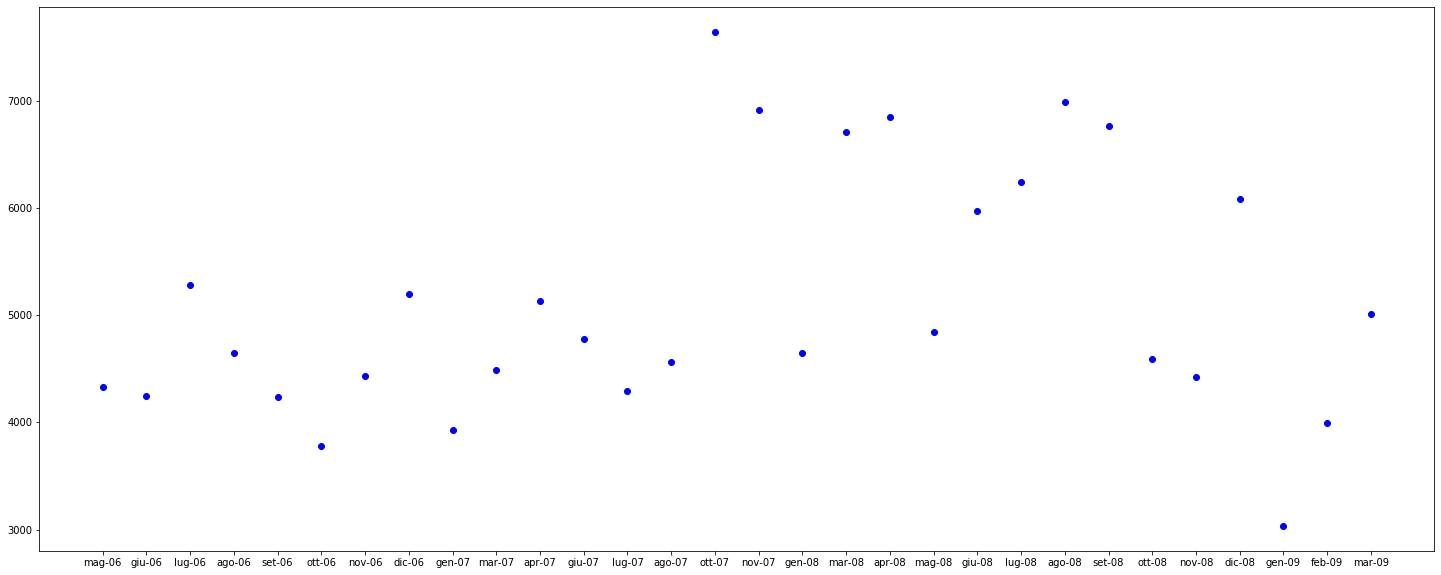

In [5]:
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(C_series_months, C_series_sales, 'bo')
plt.show()

### Performing Linear Regression

In [6]:
C_slope, C_intercept, _, _, _ = scipy.stats.linregress(C_series_months_num, C_series_sales)

print(C_slope, C_intercept)

29.827273077812908 4471.879386134033


### Visualizing the model

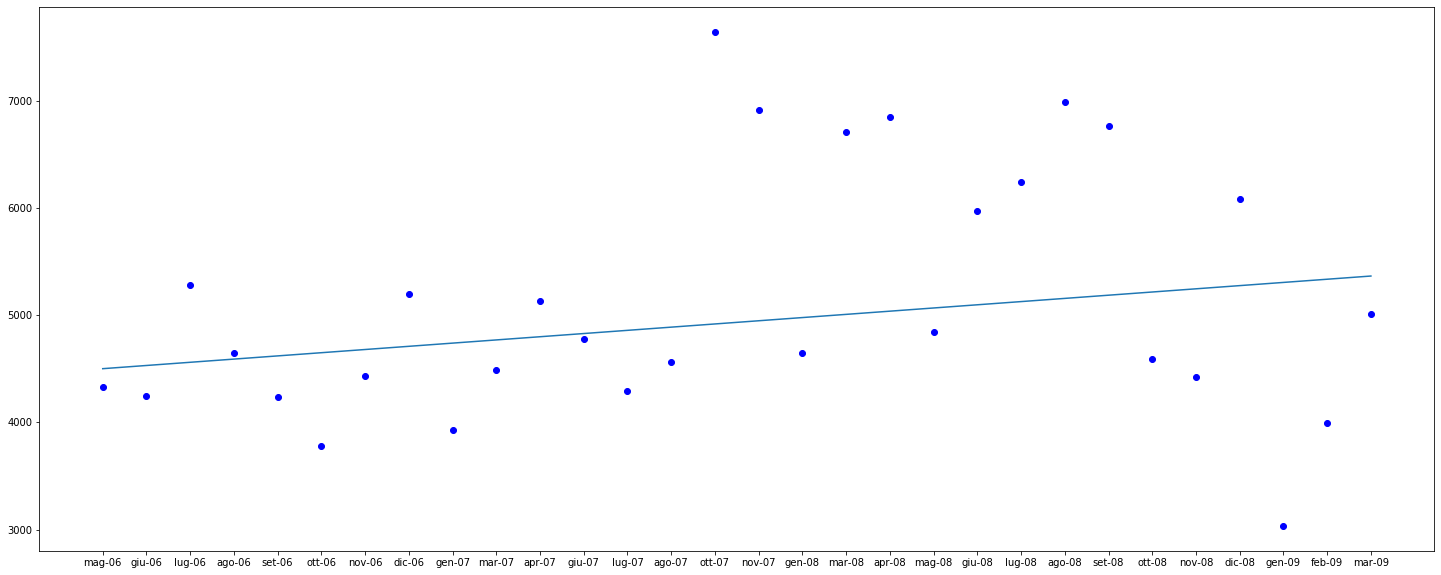

In [7]:
x = []
y = []
for i,val in enumerate(C_series_months):
    x.append(val)
    y.append( (i+1) * C_slope + C_intercept)
    
plt.plot(x, y)
plt.plot(C_series_months, C_series_sales, 'bo')
plt.show()

# E series 

### Loading the data

In [8]:
E_series_months, E_series_sales = get_sales(sales_data, "E")

print("\n")
print(E_series_months)
print("\n")
print(E_series_sales)

E_series_months_num = []
for val in E_series_months:
    month, year = val.split("-")
    E_series_months_num.append(months[month]+(12*(int(year) - int(base_year))))

print("\n")
print(E_series_months_num)

Invalid data for feb-07. Skipping it...
Invalid data for mag-07. Skipping it...
Invalid data for set-07. Skipping it...
Invalid data for dic-07. Skipping it...
Invalid data for feb-08. Skipping it...


['mag-06', 'giu-06', 'lug-06', 'ago-06', 'set-06', 'ott-06', 'nov-06', 'dic-06', 'gen-07', 'mar-07', 'apr-07', 'giu-07', 'lug-07', 'ago-07', 'ott-07', 'nov-07', 'gen-08', 'mar-08', 'apr-08', 'mag-08', 'giu-08', 'lug-08', 'ago-08', 'set-08', 'ott-08', 'nov-08', 'dic-08', 'gen-09', 'feb-09', 'mar-09']


[4070, 4213, 4479, 3955, 4112, 4895, 4918, 7116, 3375, 4019, 4011, 3686, 3227, 3718, 4176, 4464, 2980, 3039, 3208, 2275, 4360, 4938, 2681, 2968, 2098, 2264, 3464, 1768, 2104, 1978]


[5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


### Plotting the sales data

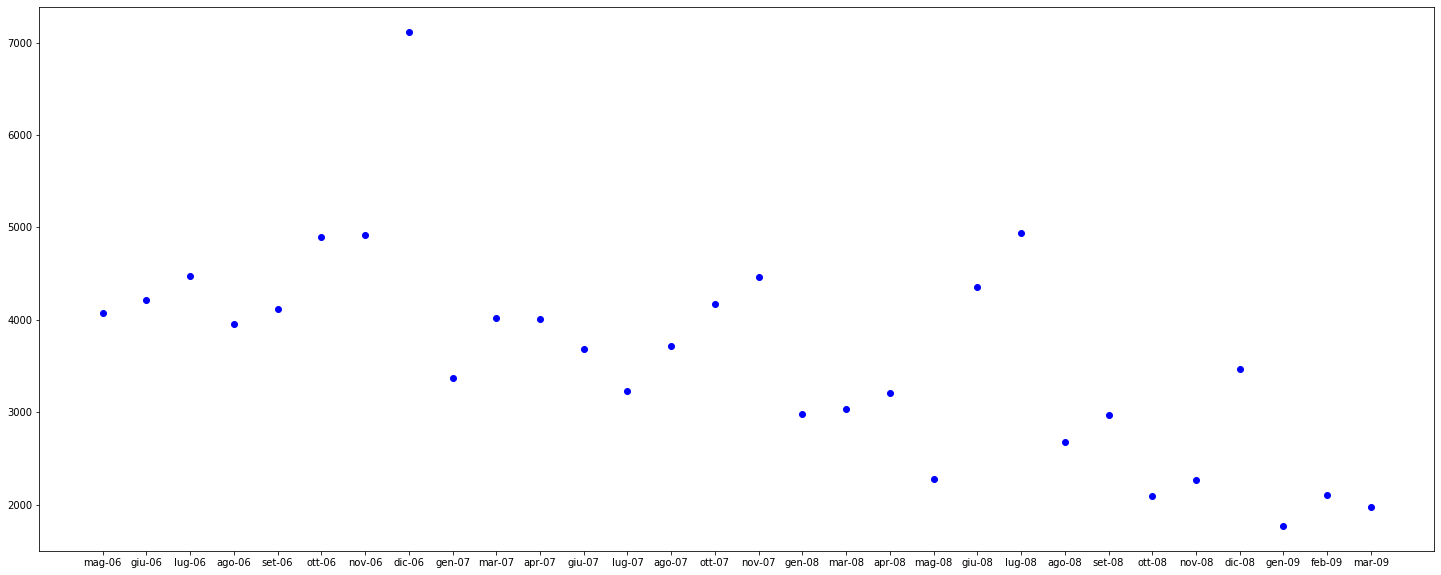

In [9]:
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(E_series_months, E_series_sales, 'bo')
plt.show()

### Performing Linear Regression

In [10]:
E_slope, E_intercept, _, _, _ = scipy.stats.linregress(E_series_months_num, E_series_sales)

print(E_slope, E_intercept)

-69.55880311560114 5167.476016040719


### Visualizing the model

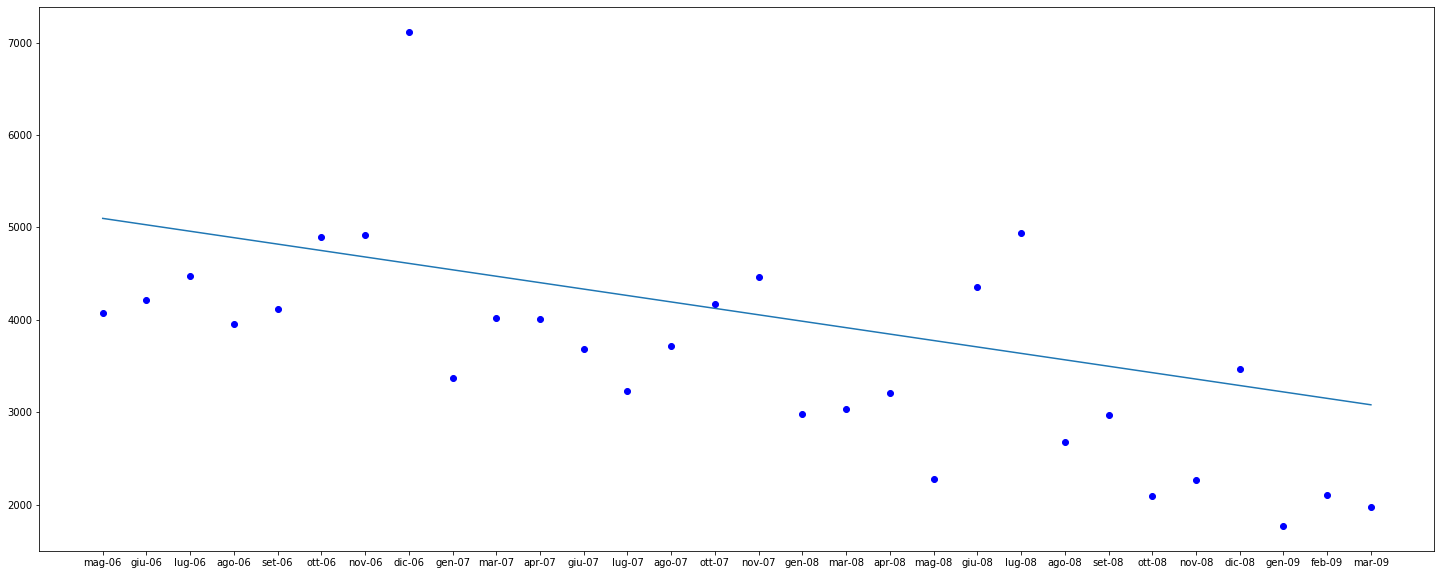

In [11]:
x = []
y = []
for i,val in enumerate(E_series_months):
    x.append(val)
    y.append( (i+1) * E_slope + E_intercept)
    
plt.plot(x, y)
plt.plot(E_series_months, E_series_sales, 'bo')
plt.show()